<a href="https://colab.research.google.com/github/SeniraVinwath/breast-cancer-ml-analysis/blob/main/NoteBook2_20220997.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing pandas library for data manipulation and analysis
import pandas as pd

# Importing NumPy for numerical operations on arrays and matrices
import numpy as np

# Importing functions for model training and hyperparameter tuning
from sklearn.model_selection import train_test_split, GridSearchCV

# Importing Logistic Regression model for binary/multiclass classification
from sklearn.linear_model import LogisticRegression

# Importing Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# Importing K-Nearest Neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# Importing evaluation metrics for classification
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, accuracy_score

# Importing general metrics like accuracy, precision, recall, F1-score, etc.
from sklearn import metrics

# Importing matplotlib for plotting and visualizations
import matplotlib.pyplot as plt

In [ ]:
# Loading the Preprocessed classification data frame from Notebook1
data_frame = pd.read_csv('/content/classification_data.csv')

In [ ]:
# Displaying the first 5 rows of the preprocessed classification dataset to verify successful loading
data_frame.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Mortality_Status
0,0.288136,0,3,2,3,1,1,1,0.949640,1,1,0.416667,0.066667,1
1,0.644068,0,1,3,5,3,3,1,0.136691,1,0,0.150000,0.200000,0
2,0.254237,0,1,1,1,2,2,1,0.136691,1,1,0.416667,0.022222,1
3,0.186441,0,2,2,3,2,2,1,0.244604,1,1,0.366667,0.066667,1
4,0.474576,0,2,1,2,3,3,1,0.338129,1,1,0.183333,0.022222,0


In [ ]:
# Splitting the dataset into features (X) and target variable (y)
# X contains all relevant input features for classification
# y contains the target label (Mortality_Status)
X = data_frame[['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Regional_Node_Positive']]
y = data_frame['Mortality_Status']

In [ ]:
# Listing all feature column names in the feature set X
list(X.columns)

['Age',
 'Sex',
 'T_Stage',
 'N_Stage',
 '6th_Stage',
 'Differentiated',
 'Grade',
 'A_Stage',
 'Tumor_Size',
 'Estrogen_Status',
 'Progesterone_Status',
 'Regional_Node_Examined',
 'Regional_Node_Positive']

In [ ]:
# Getting the name of the target variable y
y.name

'Mortality_Status'

In [ ]:
# Splitting the dataset into training and testing sets
# 40% of the data is used for testing
# Stratify ensures the class distribution remains consistent in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=43, stratify=y)

In [ ]:
def evaluate_classifier(model, X_train, X_test, y_train, y_test, model_name):
    # Fit the model to the training data (X_train and y_train)
    model.fit(X_train, y_train)

    # Use the fitted model to make predictions on the test data (X_test)
    y_pred = model.predict(X_test)

    # Calculate accuracy by comparing predicted values with the true test values (y_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)

    # Generate a classification report, which includes precision, recall, f1-score for each class
    # target_names=['Alive', 'Dead'] specify the class labels
    report = classification_report(y_test, y_pred, target_names=['Alive', 'Dead'])

    # Create a confusion matrix to evaluate how well the model's predictions match the actual results
    cm = confusion_matrix(y_test, y_pred, labels=[1, 0])  # 1 for Alive, 0 for Dead

    # Visualize the confusion matrix using ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Alive', 'Dead'])

    # Plot the confusion matrix with format for the values (no decimals shown)
    disp.plot(values_format='.0f')

    # Set the plot title dynamically using the model_name provided
    plt.title(f'Confusion Matrix - {model_name}')

    # Display the confusion matrix plot
    plt.show()

    # Check if both classes are present in the y_test (if there are both Alive and Dead labels)
    if len(set(y_test)) > 1:
        # If both classes are present, plot the ROC curve for the model
        RocCurveDisplay.from_estimator(model, X_test, y_test)

        # Set the plot title dynamically using the model_name provided
        plt.title(f'ROC Curve - {model_name}')

        # Display the ROC curve plot
        plt.show()
    else:
        # If only one class is present in y_test, print a warning and don't plot the ROC curve
        print(f"Warning: ROC curve not plotted. Only one class present in y_test for {model_name}.")

    # Print the overall performance of the model, including accuracy and classification report
    print(f"\n{model_name} Performance:")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)

    # Return the model's accuracy and the classification report for further analysis
    return accuracy, report

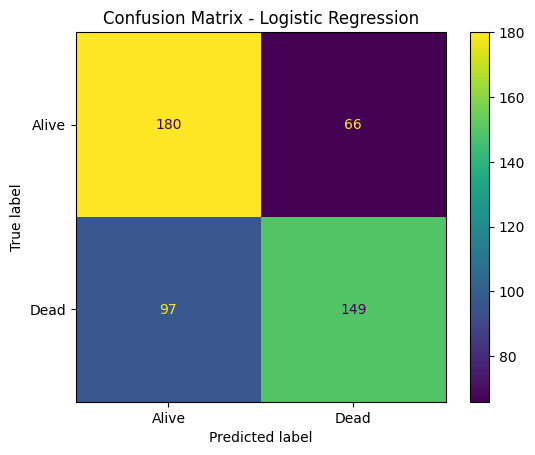

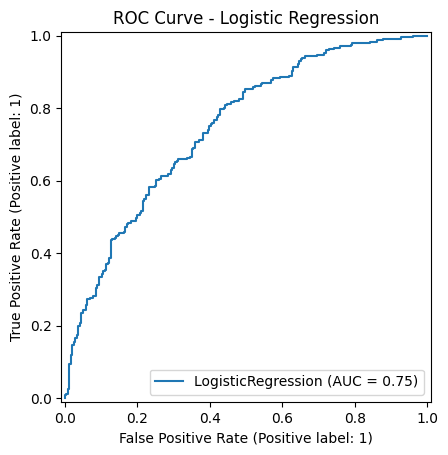


Logistic Regression Performance:
Accuracy: 0.6686991869918699
Classification Report:
               precision    recall  f1-score   support

       Alive       0.69      0.61      0.65       246
        Dead       0.65      0.73      0.69       246

    accuracy                           0.67       492
   macro avg       0.67      0.67      0.67       492
weighted avg       0.67      0.67      0.67       492



In [ ]:
# Initialize the Logistic Regression model with a fixed random state for reproducibility
logistic_model = LogisticRegression(random_state=42)

# Call the evaluate_classifier function to evaluate the logistic_model using the training and testing data
# It will return the accuracy and classification report of the model
logistic_accuracy, logistic_report = evaluate_classifier(logistic_model, X_train, X_test, y_train, y_test, "Logistic Regression")

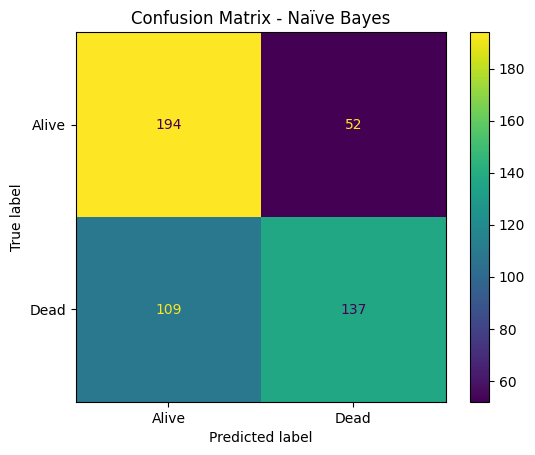

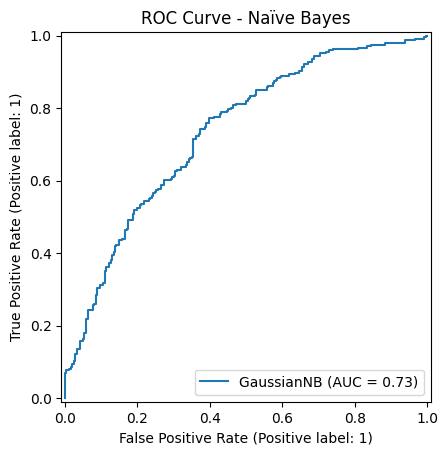


Naïve Bayes Performance:
Accuracy: 0.6727642276422764
Classification Report:
               precision    recall  f1-score   support

       Alive       0.72      0.56      0.63       246
        Dead       0.64      0.79      0.71       246

    accuracy                           0.67       492
   macro avg       0.68      0.67      0.67       492
weighted avg       0.68      0.67      0.67       492



In [ ]:
# Initialize the Naive Bayes model (Gaussian Naive Bayes) for classification
naive_bayes_model = GaussianNB()

# Call the evaluate_classifier function to evaluate the naive_bayes_model using the training and testing data
# It will return the accuracy and classification report of the model
naive_bayes_accuracy, naive_bayes_report = evaluate_classifier(naive_bayes_model, X_train, X_test, y_train, y_test, "Naïve Bayes")

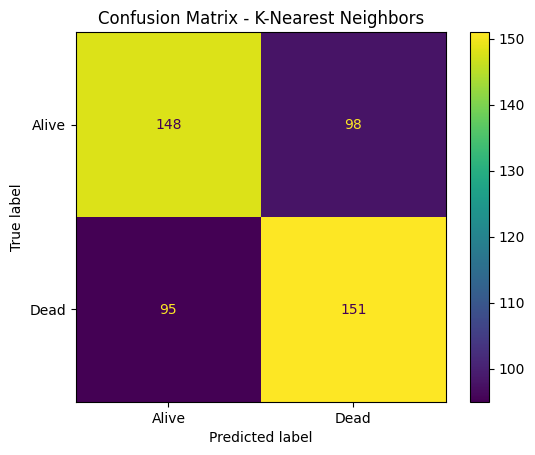

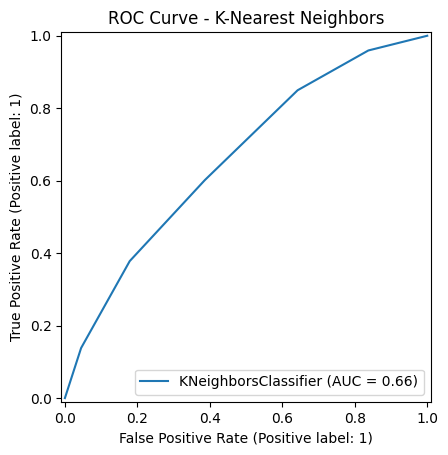


K-Nearest Neighbors Performance:
Accuracy: 0.6077235772357723
Classification Report:
               precision    recall  f1-score   support

       Alive       0.61      0.61      0.61       246
        Dead       0.61      0.60      0.61       246

    accuracy                           0.61       492
   macro avg       0.61      0.61      0.61       492
weighted avg       0.61      0.61      0.61       492



In [ ]:
# Initialize the K-Nearest Neighbors (KNN) model for classification
knn_model = KNeighborsClassifier()

# Call the evaluate_classifier function to evaluate the knn_model using the training and testing data
# It will return the accuracy and classification report of the model
knn_accuracy, knn_report = evaluate_classifier(knn_model, X_train, X_test, y_train, y_test, "K-Nearest Neighbors")

In [ ]:
# Print a header for the model comparison section
print("\nModel Comparison:")

# Print the accuracy of the Logistic Regression model with 4 decimal places
print(f"Logistic Regression - Accuracy: {logistic_accuracy:.4f}")

# Print the accuracy of the Naïve Bayes model with 4 decimal places
print(f"Naïve Bayes - Accuracy: {naive_bayes_accuracy:.4f}")

# Print the accuracy of the K-Nearest Neighbors (KNN) model with 4 decimal places
print(f"KNN - Accuracy: {knn_accuracy:.4f}")


Model Comparison:
Logistic Regression - Accuracy: 0.6687
Naïve Bayes - Accuracy: 0.6728
KNN - Accuracy: 0.6077


In [ ]:
# Create a dictionary to store the F1-scores for each model
f1_scores = {
    # Extract the macro average F1-score from the Logistic Regression report
    'Logistic Regression': float(logistic_report.split()[-4]),  # Macro avg F1-score

    # Extract the macro average F1-score from the Naïve Bayes report
    'Naïve Bayes': float(naive_bayes_report.split()[-4]),

    # Extract the macro average F1-score from the K-Nearest Neighbors report
    'K-Nearest Neighbors': float(knn_report.split()[-4])
}

# Find the model with the highest F1-score
best_model_name = max(f1_scores, key=f1_scores.get)

# Print the name of the best model and its corresponding Macro avg F1 score
print(f"\nBest Model: {best_model_name} with Macro Avg F1 Score: {f1_scores[best_model_name]:.4f}")


Best Model: Naïve Bayes with Macro Avg F1 Score: 0.6800


In [ ]:
# Check which model was determined to be the best model based on the F1 score
if best_model_name == "Logistic Regression":
    # Set hyperparameter grid for Logistic Regression model tuning
    param_grid = {
        # Testing different values for the regularization strength (C) and solvers
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    }
    # Initialize the Logistic Regression model with a fixed random state for reproducibility
    model_to_tune = LogisticRegression(random_state=42)

# Check if Naïve Bayes is the best model
elif best_model_name == "Naïve Bayes":
    # Set hyperparameter grid for Naïve Bayes model tuning
    param_grid = {
        # Testing different values for the variance smoothing parameter
        'var_smoothing': np.logspace(0, -9, num=10)
    }
    # Initialize the Naïve Bayes model (GaussianNB)
    model_to_tune = GaussianNB()

# If neither Logistic Regression nor Naïve Bayes is the best, assume K-Nearest Neighbors is the best
else:  # K-Nearest Neighbors
    # Set hyperparameter grid for K-Nearest Neighbors model tuning
    param_grid = {
        # Testing different values for the number of neighbors, weight functions, and distance metrics
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
    # Initialize the K-Nearest Neighbors model
    model_to_tune = KNeighborsClassifier()

In [ ]:
# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(model_to_tune, param_grid, cv=5, scoring='f1', n_jobs=-1)

In [ ]:
# Fit the grid search model to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])},
             scoring='f1')

In [ ]:
# Retrieve the best performing model found by GridSearchCV
best_model = grid_search.best_estimator_

# Use the best model to make predictions on the test set
best_predictions = best_model.predict(X_test)

# Calculate the accuracy of the best model
best_accuracy = metrics.accuracy_score(y_test, best_predictions)

# Generate a detailed classification report for the best model
best_report = classification_report(y_test, best_predictions, target_names=['Alive', 'Dead'])

# Generate a confusion matrix for the best model's predictions
best_conf_matrix = confusion_matrix(y_test, best_predictions, labels=[1, 0])

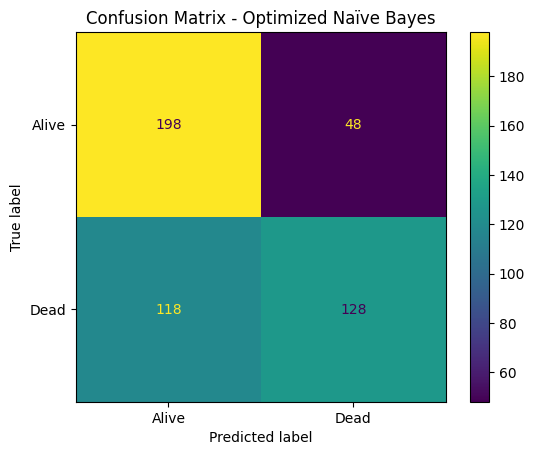

In [ ]:
# Create a ConfusionMatrixDisplay object using the best model's confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=best_conf_matrix, display_labels=['Alive', 'Dead'])

# Plot the confusion matrix with integer formatting (no decimals)
disp.plot(values_format='.0f')

# Set the plot title to indicate it's the optimized model's confusion matrix
plt.title(f'Confusion Matrix - Optimized {best_model_name}')

# Display the plot
plt.show()

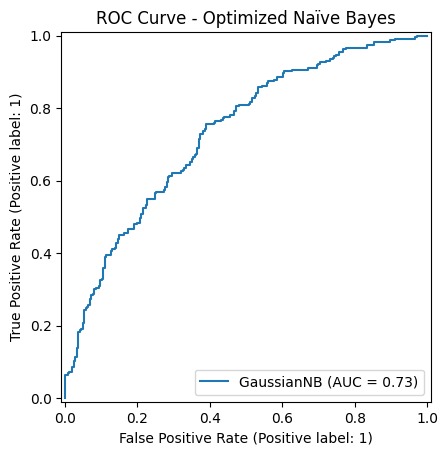

In [ ]:
# Check if y_test contains more than one class (required for plotting ROC curve)
if len(set(y_test)) > 1:
    # Plot the ROC curve using the best (tuned) model
    RocCurveDisplay.from_estimator(best_model, X_test, y_test)
    # Set the title of the plot to indicate it's for the optimized model
    plt.title(f'ROC Curve - Optimized {best_model_name}')
    # Display the plot
    plt.show()
# If y_test has only one class, print a message instead of attempting to plot
else:
    print("ROC curve not plotted: y_test contains only one class.")

In [ ]:
# Print a heading to indicate performance results of the optimized model
print(f"\nOptimized {best_model_name} Performance:")
# Print the best hyperparameters found by GridSearchCV for the selected model
print("Best Parameters:", grid_search.best_params_)
# Print the final accuracy of the optimized model on the test set
print("Accuracy:", best_accuracy)
# Print a detailed classification report including precision, recall, f1-score, and support
print("Classification Report:\n", best_report)


Optimized Naïve Bayes Performance:
Best Parameters: {'var_smoothing': np.float64(0.1)}
Accuracy: 0.6626016260162602
Classification Report:
               precision    recall  f1-score   support

       Alive       0.73      0.52      0.61       246
        Dead       0.63      0.80      0.70       246

    accuracy                           0.66       492
   macro avg       0.68      0.66      0.66       492
weighted avg       0.68      0.66      0.66       492

